# Predicting Heart Disease using machine learning 

This Notebooks looks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a patient has heart disease based on their medical attributes.

we're going to take following approach :

* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## 1.Problem Definition 
In a statement,Given clinical parameters about a patient,can we predict whether or not they have heart disease.
## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-datas

## 3.Evaluation 
If we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept, will pursue the project .

## 4.Features 
Create Data Dictionary

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format
   * : 0 = typical angi
   * 1 1 = atypical angi
   * a 2 = non — anginal pa
   * n 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = noet

In [1]:
# Importing all the tools we need 
# Regular EDA(Exploratory Data Analysis) and plotting libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we want out plot to appear inside te notebook 
%matplotlib inline 

# Import Models from sklearn

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score,recall_score,f1_score 
from sklearn.metrics import RocCurveDisplay 

# Exploring Our Data 

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape   #represents in form of pattern(rows,columns)

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find more about the data and become subject matter expert on the data set you are working with .

1. What Problem are you trying to solve?
2. What kind of data do we have?
3. How do we treat data types.
4. What's missing from data and how to deal with it?
5. Where are outliers and why should you care about them.
6. How can you add,change or remove features to get more out of data?

In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

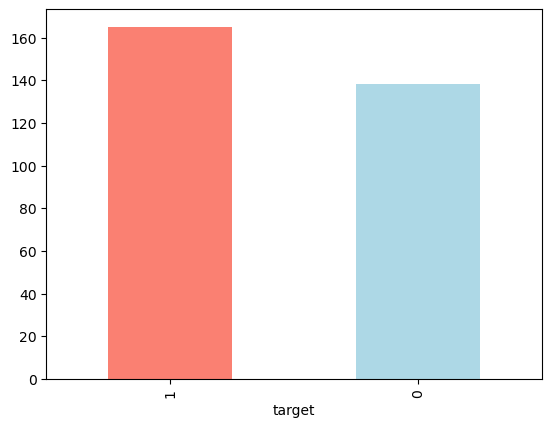

In [6]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding Patterns

Heart Disease Frequency according to sex.

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare Target Column with sex column 
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


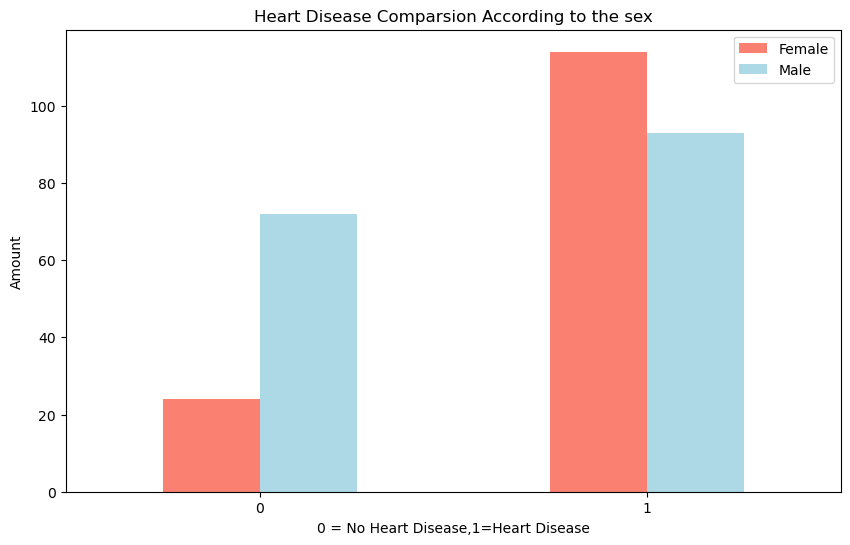

In [12]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart Disease Comparsion According to the sex')
plt.xlabel('0 = No Heart Disease,1=Heart Disease')
plt.ylabel('Amount');
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

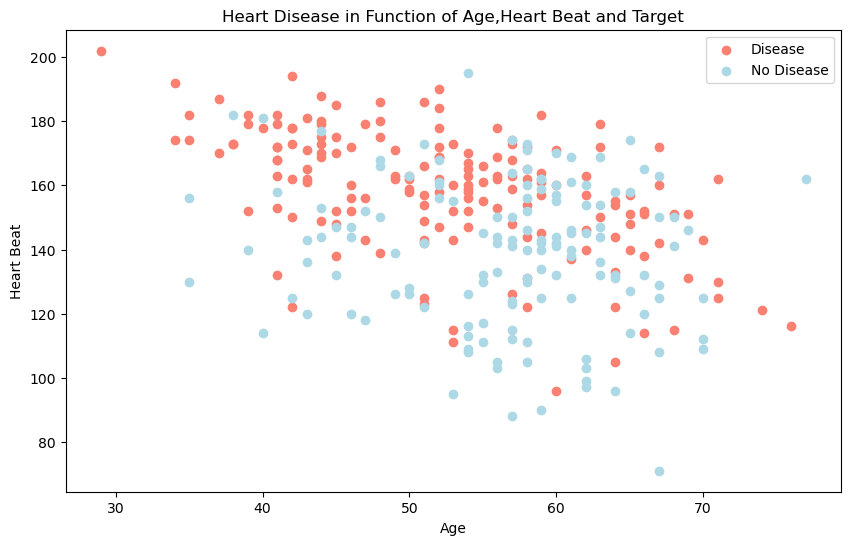

In [15]:
## Age vs Max Heart Rate vs target
# creating another figure 
plt.figure(figsize=(10,6))
# scatter with positive examples 
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c=['salmon']);
# scatter with negative examples 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');
plt.title('Heart Disease in Function of Age,Heart Beat and Target');
plt.xlabel('Age')
plt.ylabel('Heart Beat')
plt.legend(['Disease','No Disease']);

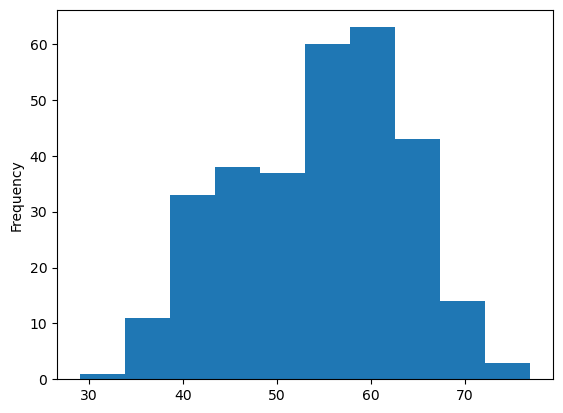

In [16]:
# Check for distributions of column on basis of age using histogram 
df.age.plot(kind='hist');

### Heart Disease Frequency per chest rate type

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
   * 0 = typical angina
   * 1 = atypical angina
   * 2 = non — anginal pain
   * 3 = asymptotic

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Make the cross tab more visual

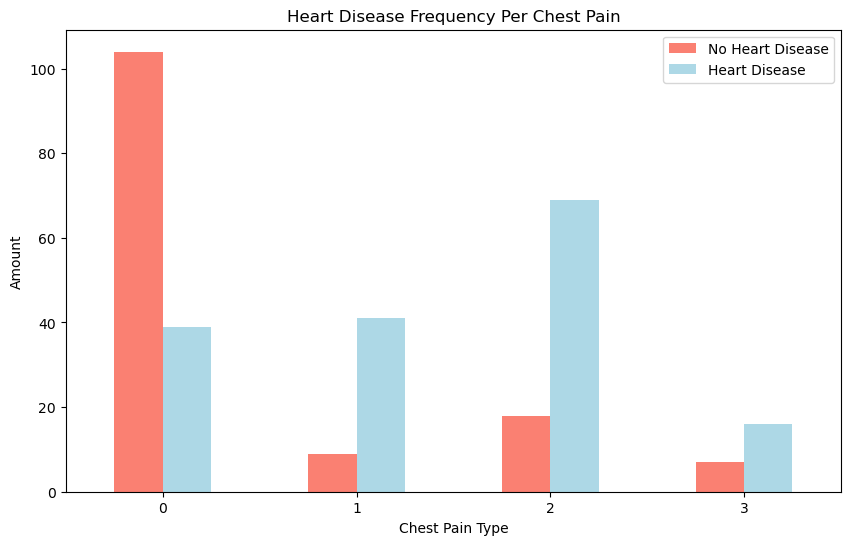

In [19]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart Disease Frequency Per Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Heart Disease','Heart Disease']);
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a Correlation Matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.1, -0.5)

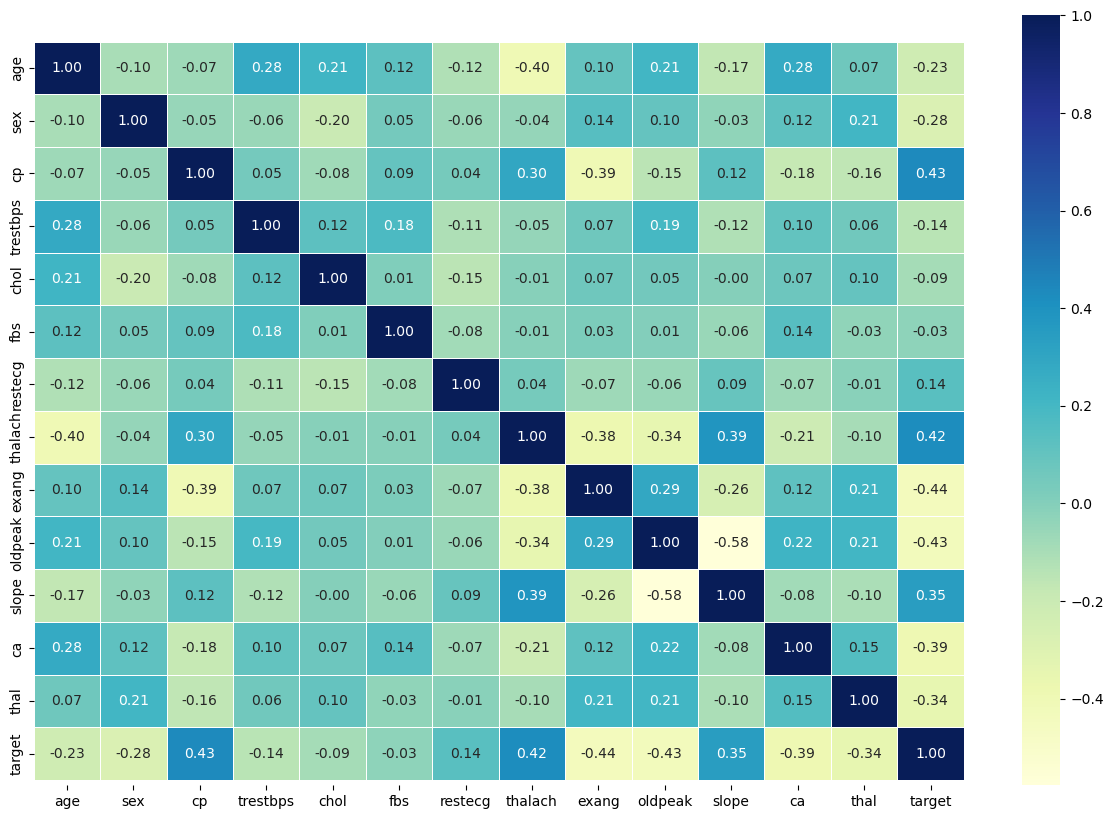

In [22]:
# Lets Make our own correlation matrix little prettier 

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt='.2f',cmap='YlGnBu');
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.1,top-0.5)

### 5. Modelling 

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# split the data into x and y 

x = df.drop(['target'],axis=1)
y = df['target']

split the data into train and test set 

In [25]:
# setting up the random seed 
np.random.seed(42)
# split the data into train and test set 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we have got our data split into train and test set . Its time to build a machine learning model . we will train it(find the patterns with the trainning set )
and we will test it (use the patterns on the test set).
we will use these 3 machine learning models :

* KNearestNeighbors Classifier
* Logistic Regression
* Random Forest Classifier 

In [28]:
# Put Models on the Dictionary 
models = {"LogisticRegression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "RandomForest":RandomForestClassifier()}

In [29]:
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [30]:
model_score = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_score

C:\Users\HP\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

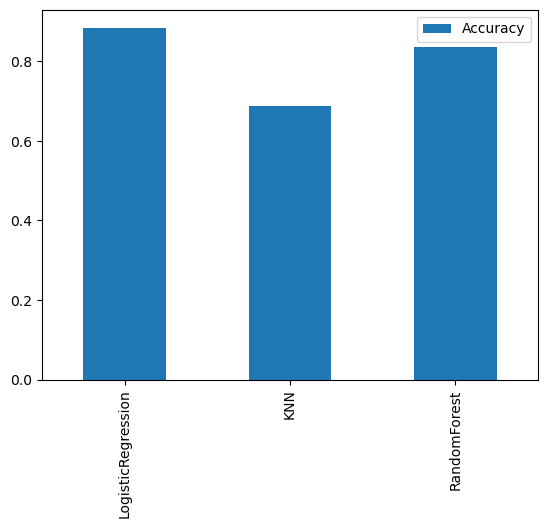

In [31]:
### Models Comparsion 
model_compare = pd.DataFrame(model_score,index=['Accuracy'])
model_compare.T.plot.bar();

# Tuning/Improving Our Model 

Now we've got a baseline model and we know a model's first predictions are not always what we should based our model our next steps off. what should we do?

Let's look at the following:

* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve(AUC)

In [32]:
## Hyperparamter tuning 

# lets tune knn 
train_scores = [] 
test_scores = [] 
# create a different value for n neighbors
neighbors = range(1,21)
# setup knn instance 
knn = KNeighborsClassifier()
# loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fill the algorithm 
    knn.fit(x_train,y_train)
    # update the trainning score 
    train_scores.append(knn.score(x_train,y_train))
    # update the test score 
    test_scores.append(knn.score(x_test,y_test))

In [33]:
train_scores
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score on the test data 75.41%


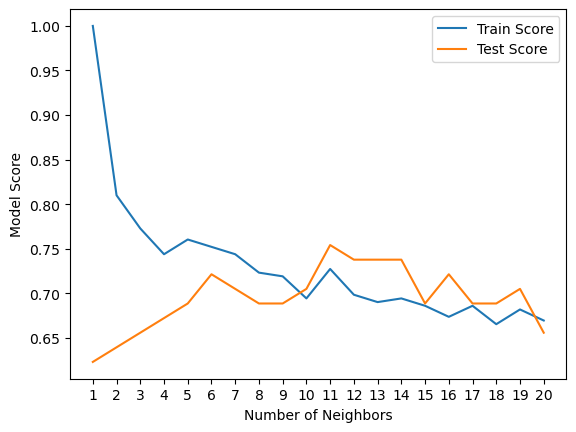

In [34]:
# plotting the graph 
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f'Maximum score on the test data {max(test_scores)*100:.2f}%')

# Tuning Hyperparamter

# Hyperparamter Tuning with RandomizedSearchCV 
we're going to tune : 
* LogisticRegression()
* RandomForestClassifier()
...using RandomizedSearchCV

In [35]:
# create a hyperparamter grid for LogisticRegression 
log_reg_grid = {"C":(-4,4,20),"solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparamters grids setup for each of our models , let's tune them using RandomizedSearchCv

In [36]:
# Tune Logistic Regression 
np.random.seed(42)
# setup hyperparamters search for logistic regression 
rs_log = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
# Fit Randomized Hyperparamters search model for logistic regression 
rs_log.fit(x_train,y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\HP\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\U

In [37]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [38]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 4}

In [39]:
rs_log.score(x_test,y_test)

0.8688524590163934

In [40]:
# Tune the RandomForestClassifier Model 
# Now we've got the logistic regression now lets do for RandomForestClassifier 

#setup the random seed
np.random.seed(42)
# set up the RandomizedSearchCv for the RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [41]:
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
rs_rf.score(x_test,y_test)

0.8688524590163934

# Tuning Hyperparamters part-3 

since our logistic regression model provide the best score on RandomizedSearchCv so now lets try with GridSearchCV.

In [44]:
# Different Hyperparamter tuning for our LogisticRegression 

log_reg_grid = {"C":np.logspace(-4,4,20),"solver":['liblinear']}

In [45]:
# set up grid hyperparamter search for logisticregression 
gs_log_grid = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

In [46]:
# Fit Grid Hyperparamter search model 
gs_log_grid.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
gs_log_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
# Evaluate the GridSearchCV for LogisticRegressionModel
gs_log_grid.score(x_test,y_test)

0.8852459016393442

In [49]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

# Evaluating our Trained LogisticRegressionModel

# Evaluating our tuned machine learning model classifier beyond accuracy 

* Roc Curve and Auc Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

... it would be great if cross validation was used where possible 

In [50]:
# To make comparsion and evaluate our trained model , first we need to make predictions 
# Make predictions with tuned model 
y_preds = gs_log_grid.predict(x_test)

In [51]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [53]:
# Plot RocCurveDisplay and calculate Auc Metric 
RocCurveDisplay(estimator_name=gs_log_grid,fpr=x_test,tpr=y_test)

In [54]:
# confusion_matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


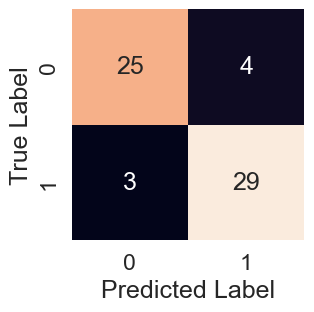

In [55]:
# Improving the visual of ConfusionMatrix using seaborn 

sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    Plot a Confusion Matrix using 
    seaborn heatmap
    '''
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plot_conf_mat(y_test,y_preds)

 Now we've got A ROC Curve,Auc metric and confusion matrix.Let's get a classification report as wee as cross validated precision,recall and f1-score

In [56]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate the evaluation metrics using CrossValidation 

we are going to calculate 
* Accuracy
* Precision
* recall
* f1_score

of our model using cross validation score and  to do so we will be using CrossValScore().

In [57]:
# Check Best Hyperparamters 
gs_log_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [58]:
# Create a new classifier with best paramters 
clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [59]:
# Finding cross validated Accuracy 
cv_acc = cross_val_score(clf,x,y,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [60]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [61]:
# Finding cross validated precision 
cv_prec = cross_val_score(clf,x,y,scoring='precision')
cv_prec

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [62]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8215873015873015

In [63]:
# Finding cross validated recall 
cv_recall = cross_val_score(clf,x,y,scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [64]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [65]:
# Finding cross validated f1score 
cv_f1 = cross_val_score(clf,x,y,scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [66]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

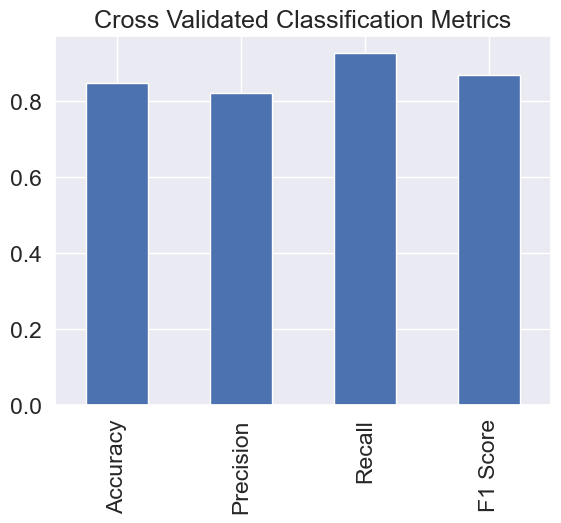

In [67]:
# Visualize our cross validation metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_prec,"Recall":cv_recall,"F1 Score":cv_f1},index=[0])

cv_metrics.T.plot.bar(title='Cross Validated Classification Metrics',legend=False);

### Feature Importance 

Feature Importance is another way of asking which feature contributed most to the outcome of the model and how did they contribute?
Lets find the feature importance for our LogisticRegressionModel()....


In [68]:
# Fit an Instance of Logistic Regression 
gs_log_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [69]:
clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [70]:
clf.fit(x_train,y_train);

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# checking coefficient 
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [81]:
# Match coef of features to columns 
features_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [82]:
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [83]:
# visulaize feature importance 
feature_df = pd.DataFrame(features_dict,index=[0])

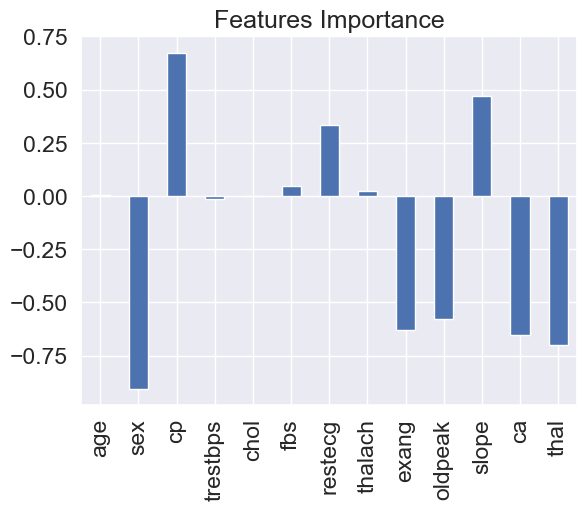

In [85]:
feature_df.T.plot.bar(title='Features Importance',legend=False);

In [86]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [88]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
